<a href="https://colab.research.google.com/github/Jobby-John/Week-4-ip/blob/main/week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [61]:
# reading in data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [62]:
df.tail()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


Checking rhe data information

In [63]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [64]:
df.columns



Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [65]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Printing the shape of our new dataset
print(df1.shape)
# Printing the shape of our old dataset
print(df.shape)

(9783, 13)
(16085, 13)


In [66]:
# determining the number of records in the dataset
df.shape

(16085, 13)

In [67]:
# checking for duplicates
df1.duplicated().any()

False

In [68]:
# checking for missing values
df1.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [69]:
df1.isnull().sum().sort_values(ascending=False)

Slots_taken_sum           0
Slots_freed_sum           0
Utilib_14_returned_sum    0
Utilib_14_taken_sum       0
Utilib_returned_sum       0
Utilib_taken_sum          0
BlueCars_returned_sum     0
BlueCars_taken_sum        0
day_type                  0
dayOfWeek                 0
n_daily_data_points       0
date                      0
Postal code               0
dtype: int64

In [70]:
#checking for unique values
df1.nunique()


Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

EXPLORATORY ANALYSIS

In [71]:
# Rename columns
col_names = df1.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

df1.columns = col_names

In [72]:
df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [73]:
df1.shape

(9783, 13)

In [74]:
#dropping some of the columns that are not helpful in our data set
df1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [75]:
df1.head(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17


In [76]:
# Extract day type data
df2 = df1[df1.day_type == 'weekend']

In [77]:
df2.head(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,weekend,28,17
3911,91330,5,weekend,24,21
3912,91330,6,weekend,27,30
3918,91330,5,weekend,16,10
3919,91330,6,weekend,18,14


In [78]:
df2.shape

(2963, 5)

UNIVARIATE ANALYSIS

In [79]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: dayofweek, dtype: float64

From the dataset, the days of the week are coded as 5 being saturday and 6 being sunday

In [80]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars taken')

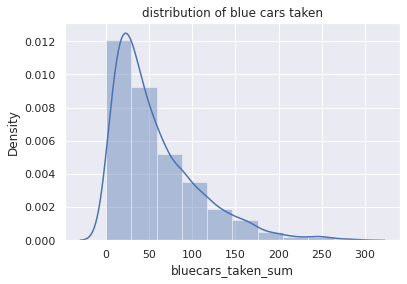

In [81]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars returned')

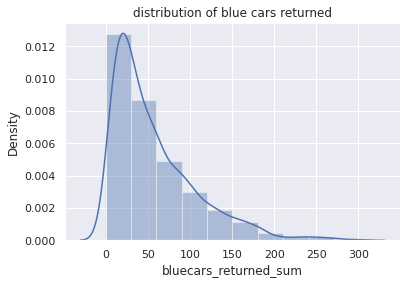

In [82]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

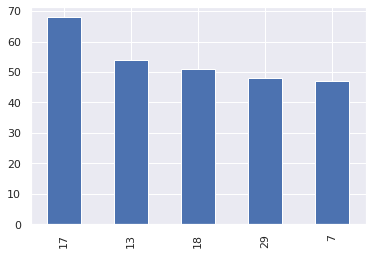

In [83]:
df2['bluecars_returned_sum'].value_counts().head().plot.bar()

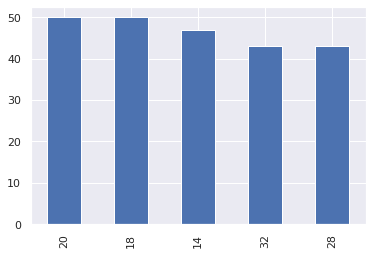

In [84]:


df2['bluecars_taken_sum'].value_counts().head().plot.bar()



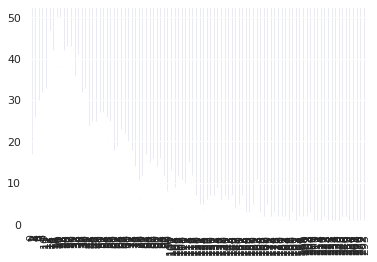

In [85]:
df2['bluecars_taken_sum'].value_counts().sort_index().plot.bar()

BIVARIATE ANALYSIS

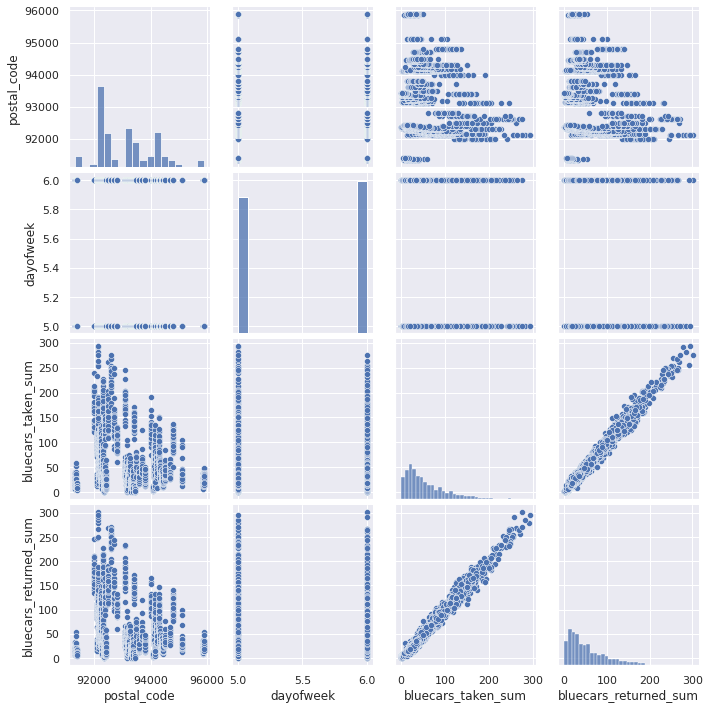

In [86]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

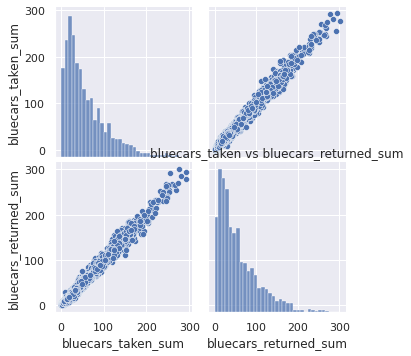

In [87]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [88]:
df2['bluecars_taken_sum'].corr(df2['bluecars_returned_sum'])

0.9906487464480561

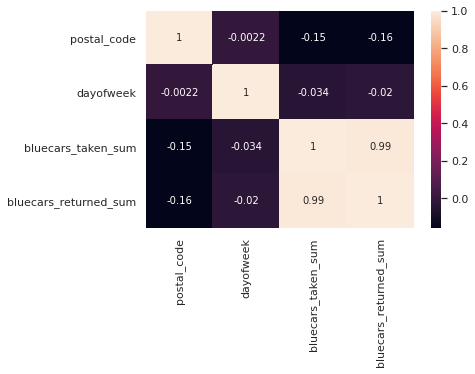

In [89]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

HYPOTHESIS TESTING

In [90]:
##  MY Null hypothesis: 
      # The average number of blue cars taken does not differ from that of the blue cars returned
##  Alternative hypothesis:  
      # the average number of blue cars taken is differs from that of the blue cars returned

In [91]:
df2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [92]:
df2.dtypes

postal_code               int64
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [93]:
#dropping the day type column as it does not help in our case here
df2.drop(['day_type'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [94]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [95]:
df2.count()

postal_code              2963
dayofweek                2963
bluecars_taken_sum       2963
bluecars_returned_sum    2963
dtype: int64

In [96]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [97]:
# shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

postal_code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




In [98]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys

STRATIFIED SAMPLING

In [99]:
# Stratified sample
df4 = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
12807,93700,5,53,56
14827,94340,5,55,56
11605,93350,5,14,15
4792,92110,5,25,25
4169,91370,5,11,8
...,...,...,...,...
4021,91330,6,30,15
15586,94800,6,50,76
7624,92310,6,82,85
9066,92410,6,15,13


In [100]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [101]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [102]:
# sample mean
b = df4['bluecars_taken_sum'].mean()
b

58.13513513513514

In [103]:
e = df4['bluecars_returned_sum'].mean()
e

57.7972972972973

In [104]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

46.32122896537865

In [105]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.4635150438388338

In [106]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.07166325011332628

In [107]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [108]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

67.7918154399348

In [109]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(37.0112293957926, 79.25904087447768)


CONCLUSION
We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.